---

# Aerodynamics (mid-term exam, Spring 2018) - Karman-Trefftz airfoil

---

This exam will last 2 hours and 30 minutes and is divided in three parts:

- In the first part, you will use the Karman-Trefftz transform to map a cylinder to a cambered airfoil with a non-zero tail angle at the trailing edge. This is similar to what we have done in the second homework with the Joukowski transform. **(70 points / 100.)**

- In the second part, you will read data from a file and apply the principle of superposition to plot the streamlines and the pressure coefficient. **(30 points.)**

- The last part is a small quiz (about the theory of lift) to glean extra points. **(12 points.)**


**Some recommendations**:

During this exam, you will have to write functions in Python.
Remember, docstrings are cool, they document your functions and help users to understand them.
You can re-use the functions you have implemented in the previous classes or in your homework.

In the first part, we already provide plotting functions to help you, so you do not have to spend too much time on tweaking the figures.
Read the docstring of the functions to understand how to use them.
(Of course, you are free to use your own code for plotting if you prefer.)

In the second part, you will create some figures with Matplotlib.
Pay attention to the quality of your figures: add a title or a caption, some axis labels, a legend (when necessary).

For the quiz in the third part, you can directly modify the markdown cell and fill it with you answers.

**Enjoy!**

In [1]:
# Import your libraries here.
import numpy
import math 
from matplotlib import pyplot
%matplotlib inline

---

## Plotting functions

---

In [2]:
def plot_geometries(z, xi,
                    xlim=(None, None), ylim=(None, None)):
    """
    Plots the geometries (in the z-plane and in the xi-plane)
    on the same axes.
    
    The coordinates of the geometries should be provided
    as 1D Numpy arrays of complex numbers where the real part
    is the x-location and the imaginary part is the y-location.
    
    Parameters
    ----------
    z: numpy.ndarray of complex numbers
        1D array with the complex coordinates in the z-plane.
    xi: numpy.ndarray of complex numbers
        1D array with the complex coordinates in the xi-plane.
    xlim: tuple of 2 floats, optional
        Limits of the x-axis;
        default: (None, None) (limits defined by the geometry).
    ylim: tuple of 2 floats, optional
        Limits of the y-axis;
        default: (None, None) (limits defined by the geometry).
    """
    fig, ax = pyplot.subplots(figsize=(6.0, 6.0))
    ax.grid()
    ax.plot(z.real, z.imag, label=r'$z$-plane',
            linestyle='-', marker='o')
    ax.plot(xi.real, xi.imag, label=r'$\xi$-plane',
            linestyle=':', marker='x')
    ax.legend(loc='best', prop={'size': 14})
    ax.axis('scaled', adjustable='box')
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.set_xlabel(r'$x$', fontname='DejaVu Serif', fontsize=16)
    ax.set_ylabel(r'$y$', fontname='DejaVu Serif', fontsize=16)
    for method in ['get_xticklabels', 'get_yticklabels']:
        for label in getattr(ax, method)():
            label.set_fontname('DejaVu Serif')
            label.set_fontsize(14)

In [3]:
def plot_meshgrids(Z, XI,
                   xlim=(None, None), ylim=(None, None)):
    """
    Plots the mesh-grids (in the z-plane and in the xi-plane)
    on two horizontally aligned axes.
    
    The mesh-grids should be provided as 2D Numpy arrays of
    complex numbers where the real part is the x-location and
    the imaginary part is the y-location.
    
    Parameters
    ----------
    Z: numpy.ndarray of complex numbers
        2D array with the complex coordinates in the z-plane.
    XI: numpy.ndarray of complex numbers
        2D array with the complex coordinates in the xi-plane.
    xlim: tuple of 2 floats, optional
        Limits of the x-axis;
        default: (None, None) (limits defined by the grids).
    ylim: tuple of 2 floats, optional
        Limits of the y-axis;
        default: (None, None) (limits defined by the grids).
    """
    fig, ax = pyplot.subplots(nrows=1, ncols=2, figsize=(10.0, 6.0))
    ax[0].set_title(r'$z$-plane',
                    fontname='DejaVu Serif', fontsize=16)
    ax[0].scatter(Z.real, Z.imag, c='black', s=0.5)
    ax[1].set_title(r'$\xi$-plane',
                    fontname='DejaVu Serif', fontsize=16)
    ax[1].scatter(XI.real, XI.imag, c='black', s=0.5)
    for a in ax:
        a.axis('scaled', adjustable='box')
        a.set_xlim(*xlim)
        a.set_ylim(*ylim)
        a.set_xlabel(r'$x$', fontname='DejaVu Serif', fontsize=16)
        a.set_ylabel(r'$y$', fontname='DejaVu Serif', fontsize=16)
        for method in ['get_xticklabels', 'get_yticklabels']:
            for label in getattr(a, method)():
                label.set_fontname('DejaVu Serif')
                label.set_fontsize(14)

In [4]:
def plot_streamlines_and_velocity(psi, W, Z, z,
                                  xlim=(None, None), ylim=(None, None),
                                  n_levels=51, s_quiver=4):
    """
    Plots the streamlines and the velocity field (quiver plot)
    on separate axes.
    
    Parameters
    ----------
    psi: numpy.ndarray of floats
        2D array of the streamfunction.
    W: numpy.ndarray of complex numbers
        2D array of the complex velocity.
    Z: numpy.ndarray of complex numbers
        2D array of the mesh-grid.
    z: numpy.ndarray of complex numbers
        1D array of the geometry.
    xlim: tuple of 2 floats, optional
        Limits of the x-axis;
        default: (None, None) (limits defined by the grids).
    ylim: tuple of 2 floats, optional
        Limits of the y-axis;
        default: (None, None) (limits defined by the grids).
    n_levels: integer, optional
        Number of levels to use for pyplot.contour;
        default: 51.
    s_quiver: positive integer, optional
        Density of the arrows in the quiver
        (the higher the more sparse);
        default: 4.
    """
    fig, ax = pyplot.subplots(nrows=1, ncols=2, figsize=(10.0, 6.0))
    # Add the streamlines.
    ax[0].set_title('Streamlines',
                    fontname='DejaVu Serif', fontsize=16)
    ax[0].contour(Z.real, Z.imag, psi, n_levels,
                  colors='black', linestyles='solid')
    ax[0].plot(z.real, z.imag,
               color='red', linestyle='-', linewidth=1)
    # Add a quiver plot of the velocity field.
    ax[1].set_title('Velocity field',
                    fontname='DejaVu Serif', fontsize=16)
    s = s_quiver
    ax[1].quiver(Z.real[::s, ::s], Z.imag[::s, ::s],
                 W.real[::s, ::s], -W.imag[::s, ::s],
                 angles='uv', scale=30, headwidth=5)
    ax[1].plot(z.real, z.imag,
               color='red', linestyle='-', linewidth=1)
    for a in ax:
        a.axis('equal')
        a.set_xlim(*xlim)
        a.set_ylim(*ylim)
        a.set_xlabel(r'$x$', fontname='DejaVu Serif', fontsize=16)
        a.set_ylabel(r'$y$', fontname='DejaVu Serif', fontsize=16)
        for method in ['get_xticklabels', 'get_yticklabels']:
            for label in getattr(a, method)():
                label.set_fontname('DejaVu Serif')
                label.set_fontsize(14)
    fig.tight_layout()

In [5]:
def plot_pressure_coefficient(cp, Z, z,
                              xlim=(None, None), ylim=(None, None)):
    """
    Plots the filled contour of the field of pressure coefficient.
    
    Parameters
    ----------
    cp: numpy.ndarray of floats
        2D array of the field of pressure coefficient.
    Z: numpy.ndarray of complex numbers
        2D array of the mesh-grid.
    z: numpy.ndarray of complex numbers
        1D array of the geometry.
    xlim: tuple of 2 floats, optional
        Limits of the x-axis;
        default: (None, None) (limits defined by the grids).
    ylim: tuple of 2 floats, optional
        Limits of the y-axis;
        default: (None, None) (limits defined by the grids).
    """
    fig, ax = pyplot.subplots(nrows=1, ncols=1, figsize=(6.0, 6.0))
    cont_levels = numpy.linspace(-1.0, 1.0, 101)
    ax.set_title('Pressure coefficient',
                 fontname='DejaVu Serif', fontsize=16)
    cont = ax.contourf(Z.real, Z.imag, cp,
                       levels=cont_levels,
                       extend='both')
    ax.plot(z.real, z.imag,
            color='red', linestyle='-', linewidth=1)
    ax.axis('scaled', adjustable='box')
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    fig.subplots_adjust(right=0.9)
    cax = fig.add_axes([0.90, 0.25, 0.05, 0.50])
    cbar_ticks = numpy.linspace(cont_levels.min(),
                                cont_levels.max(),
                                5)
    cbar = fig.colorbar(cont, cax=cax, orientation='vertical',
                        ticks=cbar_ticks)
    cbar.set_label(r'$C_p$', size=16)
    ax.set_xlabel(r'$x$', fontname='DejaVu Serif', fontsize=16)
    ax.set_ylabel(r'$y$', fontname='DejaVu Serif', fontsize=16)
    for method in ['get_xticklabels', 'get_yticklabels']:
        for label in getattr(ax, method)():
            label.set_fontname('DejaVu Serif')
            label.set_fontsize(14)

---

## First part - Karman-Trefftz conformal mapping *(70 pts)*

---

### Step 1 - Conformal mapping *(5 pts)*

The Karman-Trefftz transformation maps a cylinder (defined in the $z$-plane) to an airfoil ($\xi$-plane) that possesses a non-zero tail angle at the trailing edge.

$$\xi = n \frac{\left(1 + \frac{b^2}{z}\right)^n + \left(1 - \frac{b^2}{z}\right)^n}{\left(1 + \frac{b^2}{z}\right)^n - \left(1 - \frac{b^2}{z}\right)^n}$$

where $n = 2 - \frac{\beta}{\pi}$, with $\beta$ the tail angle (in radians) at the trailing edge and $b$ a parameter to control the thickness of the airfoil.

Note that when we choose a zero tail-angle ($\beta = 0$), the Karman-Trefftz transform reduces to the Joukowski transform.

First, we need to create the conformal mapping between the $z$-plane of the cylinder and the $\xi$-plane of the airfoil.

**List of tasks:**

1- Write a function for the conformal mapping that takes the complex coordinates in the $z$-plane as an argument and returns the the comlpex coordinates in the $\xi$-plane.

To check your function, here is what we obtained:
the point $1.2 + 2.3j$ maps into the point $1.62214306992 + 2.56964536463j$ when using $b = 0.9$ and $\beta = 3.4^\circ$.

In [6]:
# Write your conformal mapping function in this cell.
beta = (3.4/180)*math.pi
b = 0.9
n = 2 - (beta / math.pi)
z = 1.2 + 2.3 * 1j
xi = n * ((1 + (b**2) / z )**n + (1 - (b**2) / z )**n) / ((1 + (b**2) / z )**n - (1 - (b**2) / z )**n)
print(xi)
def KT_change(n, b, z):
    xi = n * ((1 + (b**2) / z )**n + (1 - (b**2) / z )**n) / ((1 + (b**2) / z )**n - (1 - (b**2) / z )**n)
    return xi

(1.6221430699180361+2.569645364630071j)


---

### Step 2 - From a cylinder  to an airfoil *(10 pts)*

Let's use our new function to map a cylinder into a Karman-Trefftz airfoil.

**List of tasks:**

1- Create a cylinder centered at $\left(x_c, y_c\right)$ with radius $R = \sqrt{\left(b - x_c\right)^2 + y_c^2}$ with $N$ points on its surface where the first and last points coincide.

Use the following parameters:
* $x_c = -0.1$, $y_c = 0.2$
* $b = 1.0$
* $\beta = 4^\circ$
* $N = 101$

2- Apply the Karman-Trefftz transformation using the function you previously defined to get the complex coordinates of the cambered airfoil.

3- Plot the two geometries on a figure. (You can use the plotting function `plot_geometries` to save some time.)

4- Find the index **and** the coordinates of the trailing-edge point.

5- Find the coordinates of the first point (index `0`) and last point (index `N - 1`) on the airfoil. Do they coincide with the trailing-edge point?

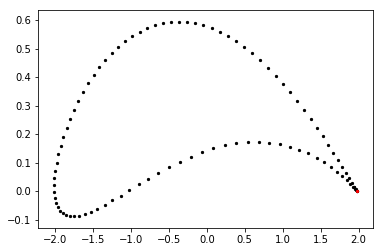

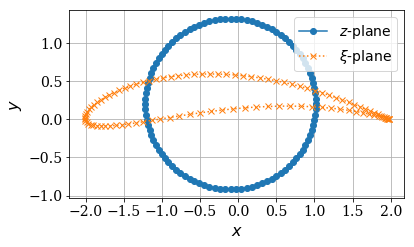

In [7]:
# Use this cell to write your code.
xc = -0.1
yc = 0.2
b = 1.0
beta = (4/180)*math.pi
n = 2 - (beta / math.pi)
N = 101
R = math.sqrt((b - xc)**2 + yc**2)
zc = complex(xc, yc)
theta = numpy.linspace(0, 2*math.pi, N)
Z = zc + R * numpy.exp(1j * theta)
X = Z.real
Y = Z.imag
xi = KT_change(n, b, Z)
x_K, y_K = xi.real, xi.imag
pyplot.scatter(x_K, y_K, color='black', s=5, marker='o')
pyplot.scatter(x_K[97], y_K[97], color='red', s=5, marker='o')
(x_K[0] - x_K[100], y_K[0] - y_K[100]) == (0,0) # NO
plot_geometries(Z, xi, xlim=(None, None), ylim=(None, None))

---

### Step 3 - Mesh-grid in polar coordinates *(5 pts)*

To visualize the flow in a domain, we should probably create a mesh-grid. Let us do it in polar coordinates in the cylinder-plane ($z$-plane).

**List of tasks:**

1- Discretize the mesh-grid using $N_r = 121$ points in the radial direction ($R \leq r \leq R+5$) and $N_\theta = 101$ points on the surface of the cylinder ($0 \leq \theta \leq 2\pi$).

2- Apply the Karman-Trefftz transformation to obtain the mesh-grid in the airfoil-plane ($\xi$-plane). (Yes! You can use the function we created above.)

3- Plot the mesh-grid in both planes. (You can use the plotting function `plot_meshgrids` to save some time.)

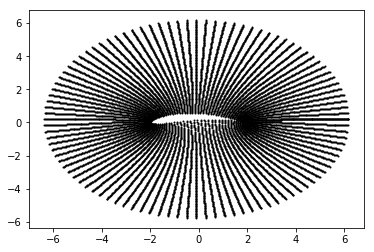

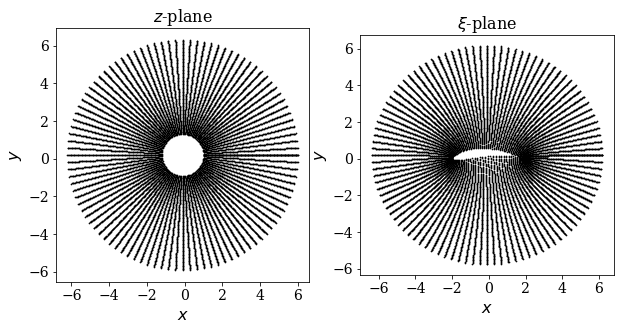

In [8]:
# Use this cell to write your code.
xc = -0.1
yc = 0.2
b = 1.0
beta = (4/180)*math.pi
n = 2 - (beta / math.pi)
N = 101
Nr = 121
R = math.sqrt((b - xc)**2 + yc**2)
r = numpy.linspace(R, R+5, Nr)
theta = numpy.linspace(0, 2*math.pi, N)
zc = complex(xc, yc)
theta_mesh, R_mesh = numpy.meshgrid(theta, r)
Z = zc + R_mesh * numpy.exp(1j * theta_mesh)
X = Z.real
Y = Z.imag
xi = KT_change(n, b, Z)
x_K, y_K = xi.real, xi.imag
pyplot.scatter(x_K, y_K, color='black', s=1, marker='o')
plot_meshgrids(Z, xi,
                   xlim=(None, None), ylim=(None, None))

In [9]:
X.shape

(121, 101)

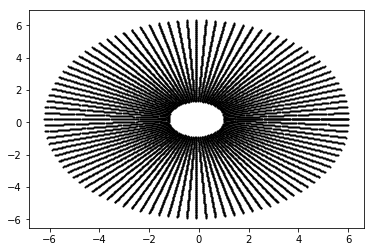

In [10]:
pyplot.scatter(X, Y, color='black', s=1, marker='o')

---

### Step 4 - Freestream + doublet = ? *(10 pts)*

We are now going to compute the velocity field around the cylinder in the $z$-plane.

As we now know, the potential flow around a cylinder (with no circulation) can be represented by the superposition of a doublet flow to a uniform freestream flow.

We will use a freestream with speed $U_\infty = 1$ and angle of incidence $\alpha = 0^\circ$.

**List of tasks:**

1- Compute the strength of the doublet to represent the flow around a cylinder of radius $R$ immersed in a freestream flow with speed $U_\infty$?

2(a)- Write a function that returns the velocity field, on a given 2D mesh-grid, due to a freestream.

2(b)- Write a function that returns the streamfunction, on a given 2D mesh-grid, due to a freestream.

3(a)- Write a function that returns the velocity field, on a given 2D mesh-grid, due to a point-doublet.

3(b)- Write a function that returns the streamfunction, on a given 2D mesh-grid, due to a point-doublet.

4- Using those functions, apply the principle of superposition to get the streamfunction and velocity in the cylinder-plane ($z$-plane).

5- Plot the streamlines and the velocity field in the $z$-plane. (You can use the plotting function `plot_streamlines_and_velocity` to save some time.)

In [11]:
# Use this cell to write your functions.
u_inf = 1.0
kappa = 2 * math.pi * u_inf * R**2
def get_freestream_velovity(u_inf):
    u = u_inf * numpy.ones((Nr, N), dtype=float)
    v = numpy.zeros((Nr, N), dtype=float)
    return u, v
def get_freestream_stream_function(u_inf, Y):
    psi = u_inf * Y
    return psi
def get_velocity_doublet(strength, X, Y, xc, yc):
    u = (-strength / (2 * math.pi) *
                ((X - xc)**2 - (Y - yc)**2) /
                ((X - xc)**2 + (Y - yc)**2)**2)
    v = (-strength / (2 * math.pi) *
                2 * (X - xc) * (Y - yc) /
                ((X - xc)**2 + (Y - yc)**2)**2)
    return u, v
def get_doublet_stream_function(strength, X, Y, xc, yc):
    psi = - strength / (2 * math.pi) * (Y - yc) / ((X - xc)**2 + (Y - yc)**2)
    return psi

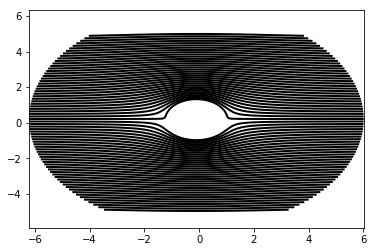

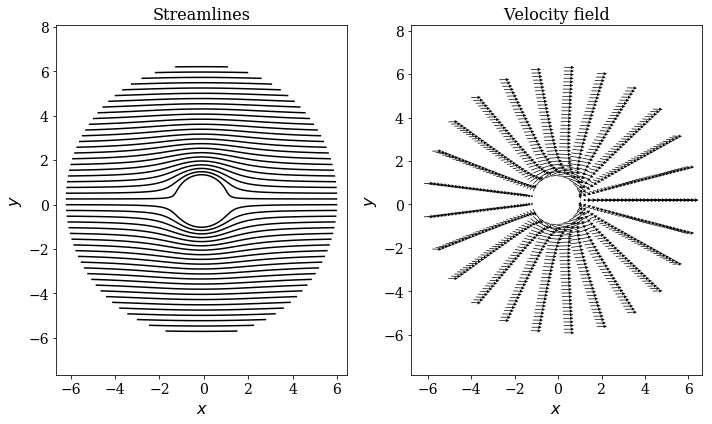

In [12]:
# Use this cell to provide the rest of the code.
u_freestream, v_freestream =  get_freestream_velovity(u_inf)
u_doublet, v_doublet = get_velocity_doublet(kappa, X, Y, xc, yc)
U = u_freestream + u_doublet
V = v_freestream + v_doublet

W = U - V*1j

psi_freestream = get_freestream_stream_function(u_inf, Y)
psi_doublet = get_doublet_stream_function(kappa, X, Y, xc, yc)
psi = psi_freestream + psi_doublet
pyplot.contour(X, Y, psi, 
               levels=numpy.linspace(-4.73, 4.73, 70), 
               colors='black', linewidths=2, linestyles='solid')
plot_streamlines_and_velocity(psi, W, Z, z,
                                  xlim=(None, None), ylim=(None, None),
                                  n_levels=51, s_quiver=4)

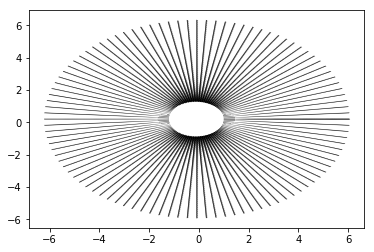

In [13]:
pyplot.quiver(X, Y, U, V)

---

### Step 5 - Freestream + doublet... Is that enough? *(10 pts)*

Let's use the theory of conformal mapping to obtain the velocity field around the airfoil in the $\xi$-plane

We remember that the complex velocity in the $\xi$-plane is related to the complex velocity in the $z$-plane via the following formula:

$$W_\xi = W_z / \frac{d\xi}{dz}$$

where $W_z = u_z - i v_z$ and $W_\xi = u_\xi - iv_\xi$ are the complex velocity in the $z$-plane and the complex velocity in the $\xi$-plane, respectively.

The derivative of $\xi$ with respect to $z$ is:

$$\frac{d\xi}{dz} = \frac{4n^2b^2}{z^2 - b^4} \frac{\left(1 + \frac{b^2}{z}\right)^n \left(1 - \frac{b^2}{z}\right)^n}{\left[\left(1 + \frac{b^2}{z}\right)^n - \left(1 - \frac{b^2}{z}\right)^n\right]^2}$$

**List of tasks:**

1- Write a function that takes the complex coordinates in the $z$-plane as argument and returns the value of the derivative $\frac{d\xi}{dz}$.

To check your function, here is what we obtained:
the function on the point $1.2 + 2.3j$ returns the point $1.30174942236 + 0.0960827079789j$ when using $b = 0.9$ and $\beta = 3.4^\circ$.

2- Use the function to compute the complexe velocity in the airfoil plane ($\xi$-plane).

3- Plot the streamlines and the velocity field in the $\xi$-plane. (You can use the plotting function `plot_streamlines_and_velocity` to save some time.)

4- Does the streamlines at the trailing-edge look physical? Explain why?
(You can display a zoom at the trailing-edge to support your answer.)

In [14]:
# Use this cell to write your function.
#n = 2 - (3.4/180)
#z = 1.2 + 2.3*1j
#b = 0.9
def derivative_of_KT(n, b, z):
    xi_d = (4*(n**2)*(b**2)/(z**2 - b**4)) * ((1 + (b**2) / z )**n * (1 - (b**2) / z )**n) / ((1 + (b**2) / z )**n - (1 - (b**2) / z )**n)**2
    return xi_d
#xi_d = derivative_of_KT(n, b, z)
#print(xi_d)

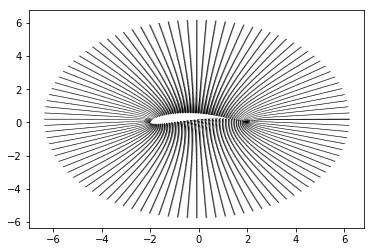

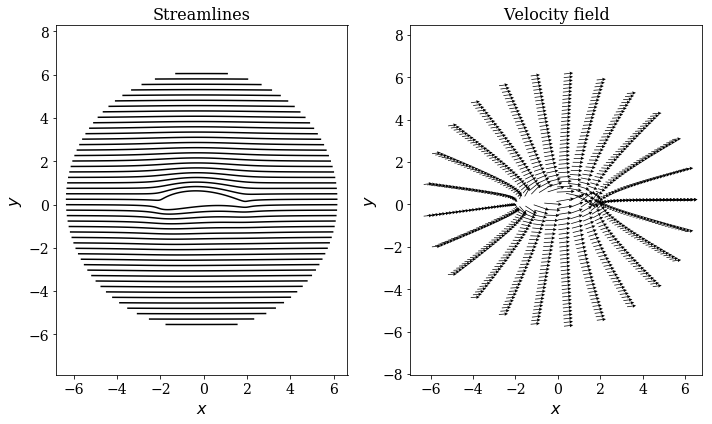

In [15]:
# Use this cell to provide the rest of the code.
xi_d = derivative_of_KT(n, b, z)
W_z = U - V *1j
W_xi = W_z / xi_d
U1, V1 = W_xi.real, -W_xi.imag

W1 = U1 - V1*1j

pyplot.quiver(x_K, y_K, U1, V1)
plot_streamlines_and_velocity(psi, W1, xi, zc,
                                  xlim=(None, None), ylim=(None, None),
                                  n_levels=51, s_quiver=4)

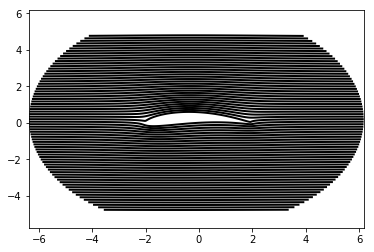

In [16]:
pyplot.contour(x_K, y_K, psi, 
               levels=numpy.linspace(-4.73, 4.73, 70), 
               colors='black', linewidths=2, linestyles='solid')


#NO. Because the trailing edge of the air foil is not flat, so the streamlines should not be flat.

---

### Step 6 - Pressure coefficient *(10 pts)*

Let's have a look at the pressure coefficient to check what's going on.

**List of tasks:**

1- Compute and plot the pressure coefficient in both planes. (You can use the plotting function `plot_pressure_coefficient` to save some time.)

2- Find the minimum value of the pressure coefficient on the surface of the airfoil.

3- Find the index of the stagnation points?

4- The angle of incidence of the freestream is zero, so explain why the rear stagnation point is not at the trailing edge?

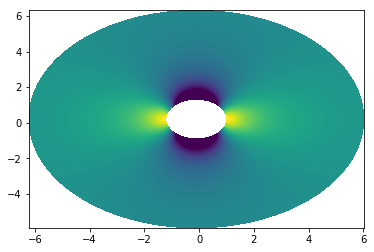

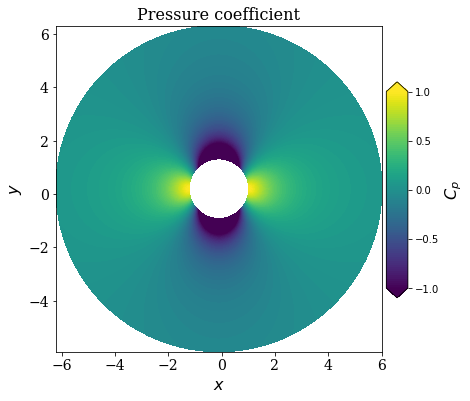

In [17]:
# Use this cell to write your code.
Cp = 1 - (U**2 + V**2)
contf = pyplot.contourf(X, Y, Cp,
                        levels=numpy.linspace(-1.0, 1.0, 100), extend='both')
plot_pressure_coefficient(Cp, Z, z,
                              xlim=(None, None), ylim=(None, None))

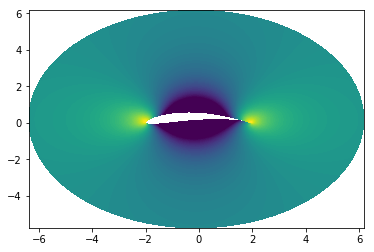

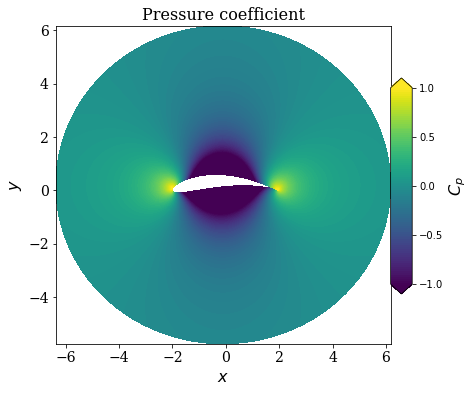

In [18]:
Cp1 = 1 - (U1**2 + V1**2)
contf = pyplot.contourf(x_K, y_K, Cp,
                        levels=numpy.linspace(-1.0, 1.0, 100), extend='both')
plot_pressure_coefficient(Cp, xi, z,
                              xlim=(None, None), ylim=(None, None))

In [19]:
numpy.argmin(Cp1[0])

25

In [20]:
numpy.argmax(Cp1[0])

0

Because the air foil is not flat, it is twisted.

---

### Step 7 - Kutta condition! *(10 pts)*

We need to satisfy the [Kutta condition](http://en.wikipedia.org/wiki/Kutta_condition),
>"A body with a sharp trailing edge which is moving through a fluid will create about itself a circulation of sufficient strength to hold the rear stagnation point at the trailing edge."

**List of tasks:**

1- Compute the circulation (strength of the point-vortex) required to satisfy the Kutta condition (i.e. to bring the rear stagnation point at the trailing-edge).

2(a)- Write a function that returns the velocity field, on a given 2D mesh-grid, due to a point-vortex.

2(a)- Write a function that returns the stremfunction, on a given 2D mesh-grid, due to a point-vortex.

3- Apply the principle of superposition to take into account the effect of the vortex.

4- Compute and plot the streamlines and velocity field in both planes. (You can use the plotting function `plot_streamlines_and_velocity` to save some time.)

5- Compute and plot the pressure coefficient in both planes. (You can use the plotting function `plot_pressure_coefficient` to save some time.)

6- What are the index of the stagnation points? Is it what you were expecting? Explain why.

In [21]:
# Use this cell to write your functions.
gamma = numpy.sin(beta) * 4 * math.pi * u_inf * R
def get_velocity_vortex(strength, X, Y, xc, yc):
    u = + strength / (2 * math.pi) * (Y - yc) / ((X - xc)**2 + (Y - yc)**2)
    v = - strength / (2 * math.pi) * (X - xc) / ((X - xc)**2 + (Y - yc)**2)
    return u, v
def get_streamfunction_vortex(strength, X, Y, xc, yc):
    psi = strength / (4 * math.pi) * numpy.log((X - xc)**2 + (Y - yc)**2)
    return psi

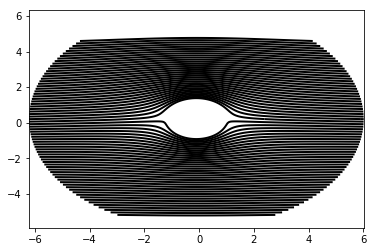

In [22]:
# Use this cell to provide the rest of the code.
u_vortex, v_vortex = get_velocity_vortex(gamma, X, Y, xc, yc)
psi_vortex = get_streamfunction_vortex(gamma, X, Y, xc, yc)
U2 = U + u_vortex
V2 = V + v_vortex

W3 = U2 + V2 * 1j

psi2 = psi_freestream + psi_doublet + psi_vortex
pyplot.contour(X, Y, psi2, 
               levels=numpy.linspace(-4.73, 4.73, 70), 
               colors='black', linewidths=2, linestyles='solid')

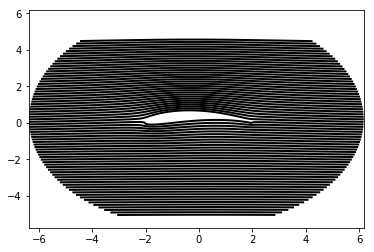

In [23]:
pyplot.contour(x_K, y_K, psi2, 
               levels=numpy.linspace(-4.73, 4.73, 70), 
               colors='black', linewidths=2, linestyles='solid')

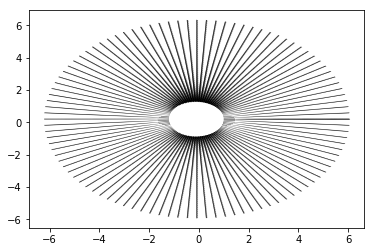

In [24]:
pyplot.quiver(X, Y, U2, V2)

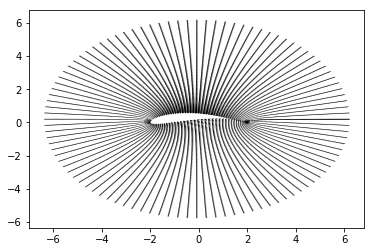

In [25]:
W_z1 = U2 - V2 * 1j
W_xi1 = W_z1 / xi_d
U3, V3 = W_xi1.real, -W_xi1.imag
pyplot.quiver(x_K, y_K, U3, V3)

In [26]:
numpy.argmin(W_xi1[0])

50

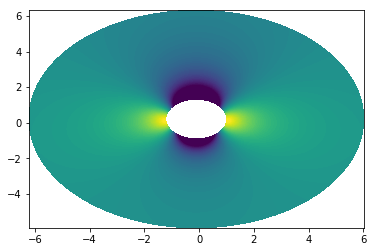

In [27]:
Cp2 = 1 - (U2**2 + V2**2)
contf = pyplot.contourf(X, Y, Cp2,
                        levels=numpy.linspace(-1.0, 1.0, 100), extend='both')

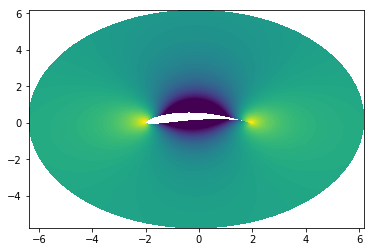

In [28]:
Cp3 = 1 - (U3**2 + V3**2)
contf = pyplot.contourf(x_K, y_K, Cp3,
                        levels=numpy.linspace(-1.0, 1.0, 100), extend='both')

In [29]:
numpy.argmax(Cp3[0])

51

In [30]:
Cp3[0, 51]

0.99983633733472743

In [31]:
Cp3[0, 99]

0.99983633733472743

---

### Step 8 - What about the lift and drag? *(10 pts)*

The drag is the force in the direction of the motion of the airfoil;
the lift is the force perpendicular.

**List of tasks:**

1- Assuming a density $\rho=1$ and a farfield pressure $p_\infty=0$, compute the lift in two ways:
* using the Kutta-Joukowski theorem,
* numerically integrating the pressure along the surface of the cylinder ($L = -\oint p \times \sin{\theta} dA$).

2- Compute the drag by numerically integrating the pressure along the surface of the cylinder ($D = -\oint p \times \cos{\theta} dA$). What's the value? Is it what you were expecting? Explain why?

In [32]:
# Use this cell to provide the code.


---

## Second part - Sources and vortices *(30 pts)*

---

In the first part of the exam, we have used a conformal mapping and the complex-variable theory to model the flow around an airfoil.

Here, we provide you a set of points which represents the previously used Karman-Trefftz airfoil, as well as the source strength and the vortex strength associated with each point.

You will need to load data from a file and apply the principle of superposition to get the velocity field, on a 2D Cartesian grid, generated by those singularities.

We are going to use the same freestream conditions: speed $U_\infty = 1$ with angle of incidence $\alpha = 0^\circ$.

The file `karmantrefftz_data.txt` contains $N$ lines (where $N$ is the number of points used to discretize the airfoil) and 4 columns (x-coordinates, y-coordinates, vortex strengths, and source strengths).

You are problably wondering how we obtained those source strengths and vortex strengths.
Well, they are the solution from the source-vortex panel method that we are going to implement during the second part of the semester.

**List of tasks:**

1- Load the data from the file `karmantrefftz_data.txt` using the Numpy function [`numpy.loadtxt()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html). (You should set the keyword argument `unpack` to `True` when using the Numpy function `numpy.loadtxt()`.)

2- Create a $121 \times 121$ Cartesian grid that covers the domain $[-2.5, 2.5]\times[-1.0, 1.0]$.

3- Write a function to compute the velocity field, on a given 2D mesh-grid, due to a source-point. (You can re-use a previously implemented function.)

4- Write a function to compute the velocity field, on a 2D mesh-grid, due to a vortex-point. (You can re-use a previously implemented function.)

5- Compute the velocity field generated by the freestream, the source-points, and the vortex-points and plot the streamlines using the Matplotlib function [`pyplot.streamplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.streamplot.html).

6- Compute the field of pressure coefficient and plot its filled contour using the Matplotlib function [`pyplot.contourf()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html). 

7- What is the maximum pressure coefficient and what are the coordinates of that point? (Add the point to the figure.)

8- Calculate the lift using the Kutta-Joukowski theorem (assume density $\rho = 1$).

In [39]:
# Use this cell to write your functions.
KZ = numpy.loadtxt("karmantrefftz_data.txt")
u_inf = 1.0
N = 121                               
x_start, x_end = -2.5, 2.5            
y_start, y_end = -1.0, 1.0            
x = numpy.linspace(x_start, x_end, N)    
y = numpy.linspace(y_start, y_end, N)    
X, Y = numpy.meshgrid(x, y)
xp = 100
def get_velocity_source(strength, xs, ys, X, Y):
    u1 = (strength / (2 * math.pi) *
          (X - xs) / ((X - xs)**2 + (Y - ys)**2))
    v1 = (strength / (2 * math.pi) *
          (Y - ys) / ((X - xs)**2 + (Y - ys)**2))
    return u1, v1
def get_velocity_vortex(strength, xc, yc, X, Y):
    u = + strength / (2 * math.pi) * (Y - yc) / ((X - xc)**2 + (Y - yc)**2)
    v = - strength / (2 * math.pi) * (X - xc) / ((X - xc)**2 + (Y - yc)**2)
    return u, v
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)

In [40]:
xc = KZ[:,0]
yc = KZ[:,1]
gamma = KZ[:,2]
ss = KZ[:,3]

In [41]:
xc.shape

(100,)

In [42]:
u=numpy.zeros_like(X)
v=numpy.zeros_like(Y)

(array([62]), array([11]))

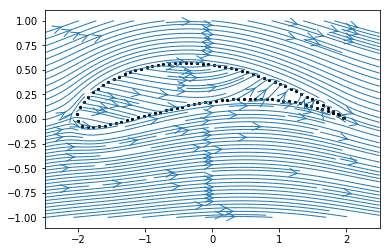

In [50]:
# Use this cell to provide the rest of the code.
for i in range(xp):
    u_source, v_source = get_velocity_source(ss[i], xc[i], yc[i], X, Y)
    u_vortex, v_vortex = get_velocity_vortex(gamma[i], xc[i], yc[i], X, Y)
    u += u_source + u_vortex
    v += v_source + v_vortex
    

u += u_freestream
v += v_freestream


pyplot.scatter(xc, yc, color='black', s=5, marker='o')
pyplot.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=2, arrowstyle='->')

numpy.where(numpy.round(u**2 + v**2, 0)==0)#stagnation points

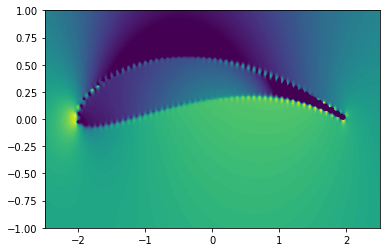

In [44]:
Cp_e = 1 - (u**2 + v**2)
contf = pyplot.contourf(X, Y, Cp_e,
                        levels=numpy.linspace(-1.0, 1.0, 100), extend='both')

---

## Third part - Quiz (extra points - *12 pts*)

---

1- What property of the fluid causes the creation of circulatory motion in the air around a spinning ball that causes it to swerve?

    Ans:

2- Imagine a ball that rotates forwards as it is moving, what will happen to range of the ball? Will it decrease or increase? Explain why.

    Ans:

3- What name is given to the effect that allows a rotating cylinder to replace a sail in a wind-powered vehicle?

    Ans:

4- Do you have rotation in a shear flow? Explain why.

    Ans:

---